**Key Takeaways**:


*   Other than transit and radial velociy, very few of the discovery methods are relevant

*   The "Transit Timing Variations" detection method was not disaggregated in the detections data

*    Histograms are number of positive detections

*    Stacked histogram without transit also has insights

*    Detection Method vs. Other Categories, like discovery telescope, could have been insightful, but nothing jumped out



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/ECE 143 Group 18 Project/NASA_planetary_data.csv', skiprows = 168)
# df2 = df[23:32]


In [ ]:
df.head()

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,...,sy_tmag,sy_tmag_reflink,sy_kepmag,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,2,1,...,3.83790,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,2.0,1,2,0,0,0
1,2,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,3.82294,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0
2,3,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,...,4.32140,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0
3,4,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,2,...,5.86310,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,4,1,0,0
4,5,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,3,1,...,5.62810,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,6.095,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,4,3,0,0


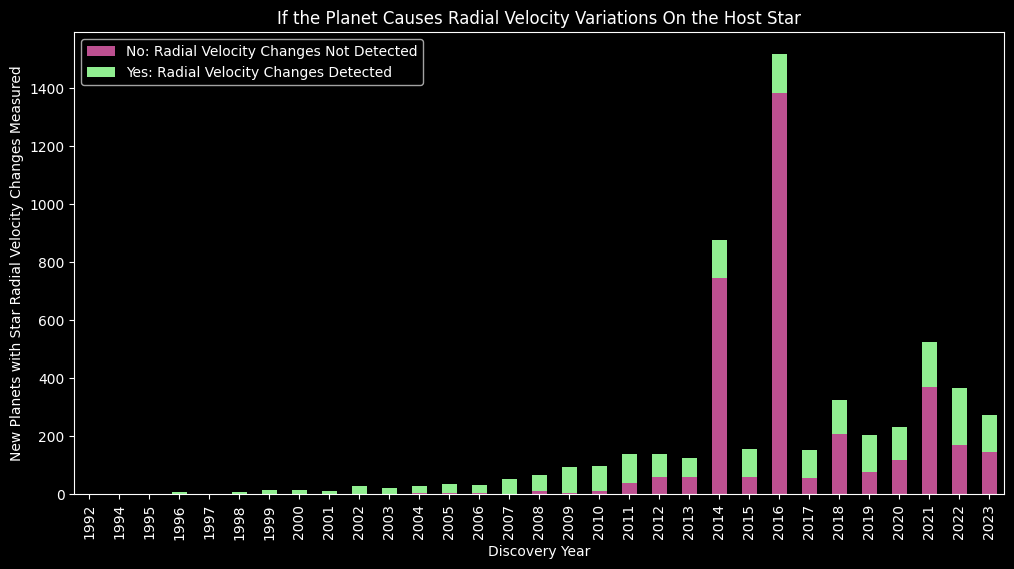

In [ ]:

#Discovery Methods in bar chart

# group discovery year and method as one data
group1 = df.groupby(['disc_year', 'rv_flag']).size().unstack()
# 'rv_flag',
#  'pul_flag',
#  'ptv_flag',
#  'tran_flag',
#  'ast_flag',
#  'obm_flag',
#  'micro_flag',
#  'etv_flag',
#  'ima_flag',
#  'dkin_flag',

# df2 = df.loc[23:32]
# df2 = df['rv_flag']
# df2 = df['Detections_by_Radial_Velocity_Variations']
# df2 = df.iloc[23:23,:]  # Select columns by range

# df2 = df.loc[23:32]
# df2
# list(df.columns)

colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])
# colors = (pol)

#plot bar chart
plt.style.use('dark_background')

ax = group1.plot(kind='bar', stacked=True, figsize=(12,6), color=['#bc5090','#90EE90'])#, hue_order=[1,0])

plt.style.use('dark_background')


plt.xlabel('Discovery Year')
plt.ylabel('New Planets with Star Radial Velocity Changes Measured')
plt.title('If the Planet Causes Radial Velocity Variations On the Host Star')
# plt.legend(title='Discovery Method',bbox_to_anchor=(1.02,1),loc='upper left')
plt.legend(['No: Radial Velocity Changes Not Detected', 'Yes: Radial Velocity Changes Detected'])
# template = 'plotly_dark')
# ax.set_title("'dark_background' style sheet")



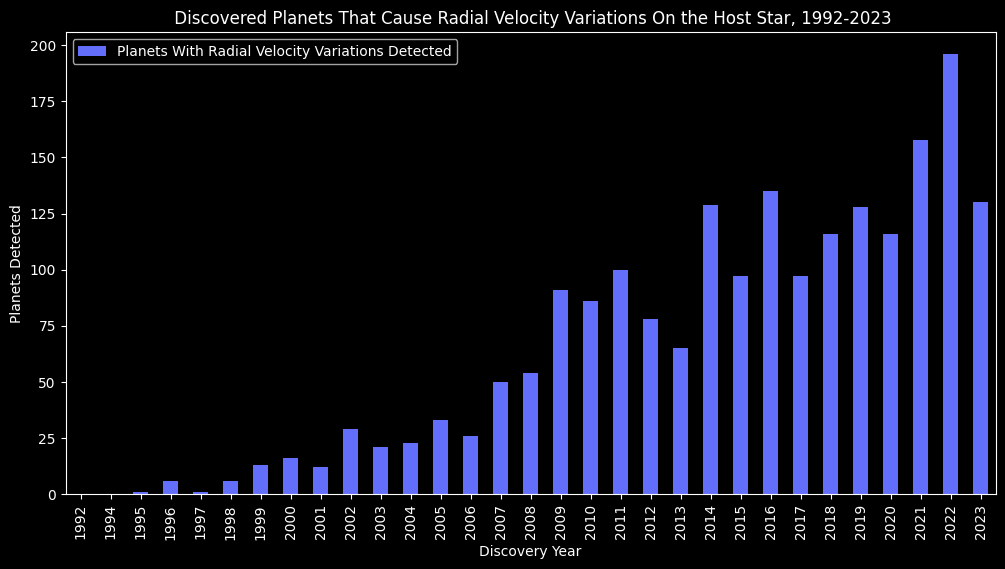

In [ ]:

df2 = df.copy();
df2['rv_flag'] = df2['rv_flag'].astype("category")
df2['rv_flag'] = df2['rv_flag'].cat.remove_categories([0])


group1 = df2.groupby(['disc_year', 'rv_flag']).size().unstack()


# colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])
colors = ['#636EFA',  '#EF553B',  '#00CC96',  '#AB63FA',  '#FFA15A',  '#19D3F3',  '#FF6692',  '#B6E880',  '#FF97FF',  '#FECB52']

#plot bar chart
ax = group1.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)#['#90EE90'])#, hue_order=[1,0])

plt.ylabel('Planets Detected')
plt.xlabel('Discovery Year')

plt.title(' Discovered Planets That Cause Radial Velocity Variations On the Host Star, 1992-2023')
plt.legend(['Planets With Radial Velocity Variations Detected'])

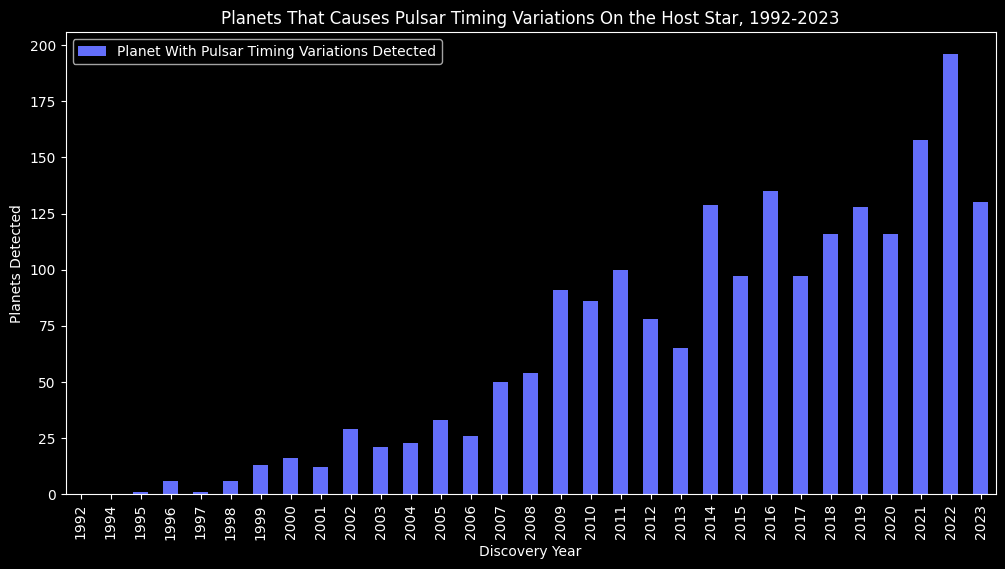

In [ ]:
# group2 = df.groupby(['disc_year', 'pul_flag']).size().unstack()

# colors2 = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

# #plot bar chart
# ax = group2.plot(kind='bar', stacked=True, figsize=(12,6), color=colors2)#, hue_order=[1,0])

# plt.xlabel('Discovery Year')
# plt.ylabel('Number of Planets & Stars with Radial Velocity Changes Detected')
# plt.title('If the Planet Causes Pulsar Timing Variations On the Host Star')
# # plt.legend(title='Discovery Method',bbox_to_anchor=(1.02,1),loc='upper left')
# plt.legend(['No: ∏ulsar Timing Changes Not Detected', 'Yes: Pulsar Timing Changes Detected'])

df2 = df.copy();
df2['pul_flag'] = df2['pul_flag'].astype("category")
df2['pul_flag'] = df2['pul_flag'].cat.remove_categories([0])


group2 = df2.groupby(['disc_year', 'pul_flag']).size().unstack()


# colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

#plot bar chart
# ax = group2.plot(kind='bar', stacked=True, figsize=(12,6), color=['#90EE90'])#, hue_order=[1,0])
colors = ['#636EFA',  '#EF553B',  '#00CC96',  '#AB63FA',  '#FFA15A',  '#19D3F3',  '#FF6692',  '#B6E880',  '#FF97FF',  '#FECB52']

#plot bar chart
ax = group1.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)#['#90EE90'])#, hue_order=[1,0])


plt.ylabel('Planets Detected')
plt.xlabel('Discovery Year')

plt.title('Planets That Causes Pulsar Timing Variations On the Host Star, 1992-2023')
plt.legend(['Planet With Pulsar Timing Variations Detected'])


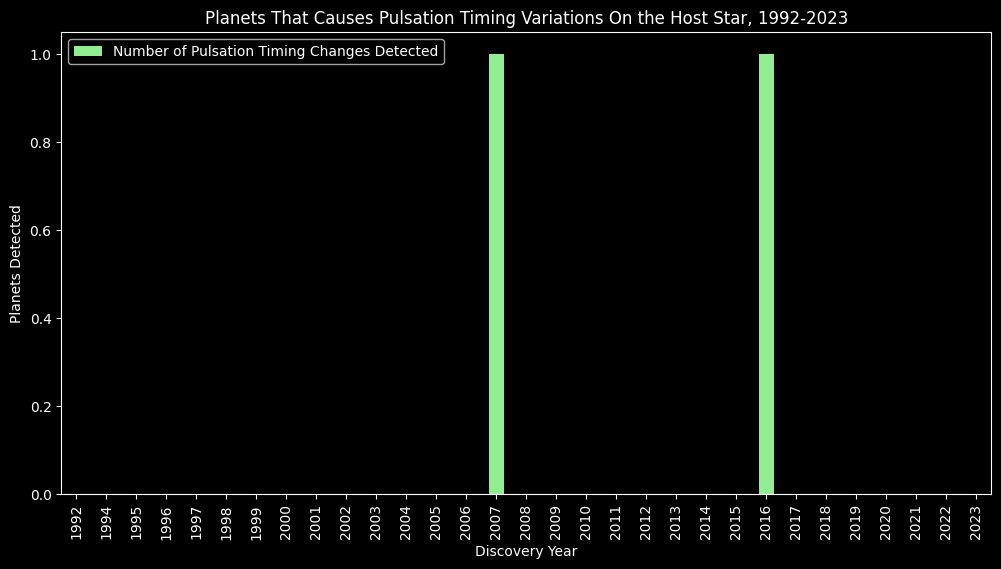

In [ ]:
# group3 = df.groupby(['disc_year', 'ptv_flag']).size().unstack()
# # 'rv_flag',
# #  'pul_flag',
# #  'ptv_flag',
# #  'tran_flag',
# #  'ast_flag',
# #  'obm_flag',
# #  'micro_flag',
# #  'etv_flag',
# #  'ima_flag',
# #  'dkin_flag',


# # colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

# #plot bar chart
# ax = group3.plot(kind='bar', stacked=True, figsize=(12,6), color=['#bc5090','#90EE90'])#, hue_order=[1,0])

# plt.xlabel('Discovery Year')
# plt.ylabel('New Planets with Star Pulsation Changes Measured')
# plt.title('If the Planet Causes Pulsation Timing Variations On the Host Star')
# # plt.legend(title='Discovery Method',bbox_to_anchor=(1.02,1),loc='upper left')
# plt.legend(['No: Pulsationg Changes Not Detected', 'Yes: Pulsation Timing Changes Detected'])

df2 = df.copy();
df2['ptv_flag'] = df2['ptv_flag'].astype("category")
df2['ptv_flag'] = df2['ptv_flag'].cat.remove_categories([0])


group3 = df2.groupby(['disc_year', 'ptv_flag']).size().unstack()


# colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

#plot bar chart
ax = group3.plot(kind='bar', stacked=True, figsize=(12,6), color=['#90EE90'])#, hue_order=[1,0])

plt.ylabel('Planets Detected')
plt.xlabel('Discovery Year')

plt.title('Planets That Causes Pulsation Timing Variations On the Host Star, 1992-2023')
plt.legend(['Number of Pulsation Timing Changes Detected'])


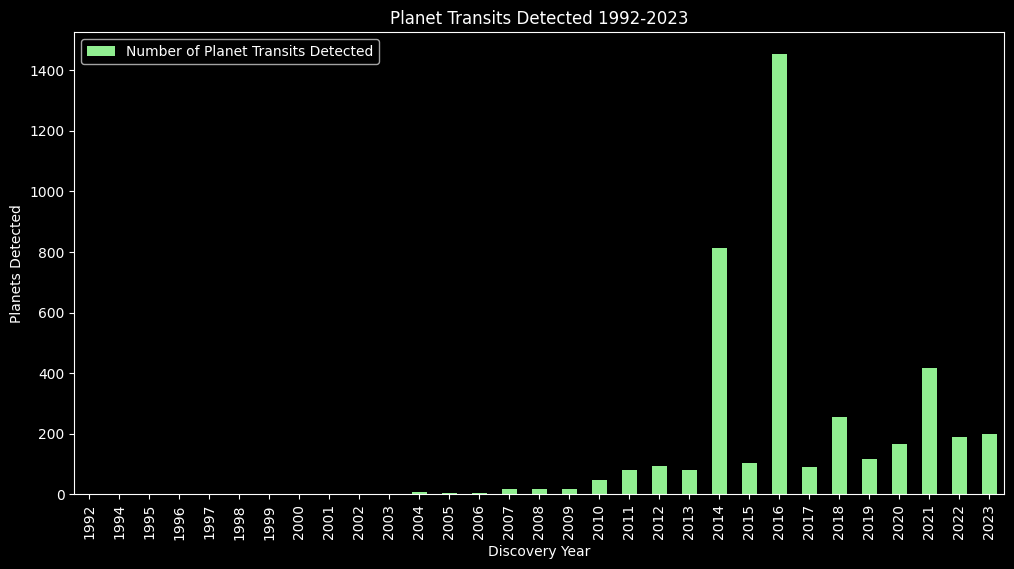

In [ ]:
# group4 = df.groupby(['disc_year', 'tran_flag']).size().unstack()
# # 'rv_flag',
# #  'pul_flag',
# #  'ptv_flag',
# #  'tran_flag',
# #  'ast_flag',
# #  'obm_flag',
# #  'micro_flag',
# #  'etv_flag',
# #  'ima_flag',
# #  'dkin_flag',


# # colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

# #plot bar chart
# ax = group4.plot(kind='bar', stacked=True, figsize=(12,6), color=['#bc5090','#90EE90'])#, hue_order=[1,0])

# plt.xlabel('Discovery Year')
# plt.ylabel('New Planets with Transit Changes Measured')
# plt.title('If the Planet Transit Was Detected')
# # plt.legend(title='Discovery Method',bbox_to_anchor=(1.02,1),loc='upper left')
# plt.legend(['No: Transit Not Detected', 'Yes: Transit Detected'])

df2 = df.copy();
df2['tran_flag'] = df2['tran_flag'].astype("category")
df2['tran_flag'] = df2['tran_flag'].cat.remove_categories([0])


group4 = df2.groupby(['disc_year', 'tran_flag']).size().unstack()


# colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

#plot bar chart
ax = group4.plot(kind='bar', stacked=True, figsize=(12,6), color=['#90EE90'])#, hue_order=[1,0])

plt.ylabel('Planets Detected')
plt.xlabel('Discovery Year')

plt.title('Planet Transits Detected 1992-2023')
plt.legend(['Number of Planet Transits Detected'])

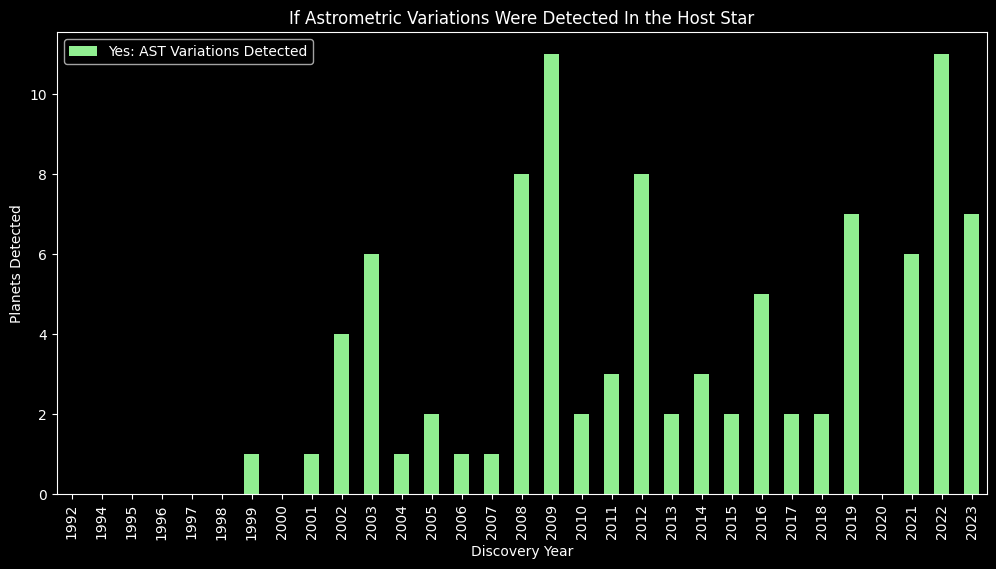

In [ ]:
# group5 = df.groupby(['disc_year', 'ast_flag']).size().unstack()
# # 'rv_flag',
# #  'pul_flag',
# #  'ptv_flag',
# #  'tran_flag',
# #  'ast_flag',
# #  'obm_flag',
# #  'micro_flag',
# #  'etv_flag',
# #  'ima_flag',
# #  'dkin_flag',


# # colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

# #plot bar chart
# ax = group5.plot(kind='bar', stacked=True, figsize=(12,6), color=['#bc5090','#90EE90'])#, hue_order=[1,0])

# plt.xlabel('Discovery Year')
# plt.ylabel('New Planets with Astrometric Variations  Measured')
# plt.title('If Astrometric Variations Were Detected In the Host Star')
# # plt.legend(title='Discovery Method',bbox_to_anchor=(1.02,1),loc='upper left')
# plt.legend(['No: AST Variations Not Detected', 'Yes: AST Variations Detected'])

df2 = df.copy();
df2['ast_flag'] = df2['ast_flag'].astype("category")
df2['ast_flag'] = df2['ast_flag'].cat.remove_categories([0])


group5 = df2.groupby(['disc_year', 'ast_flag']).size().unstack()


# colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

#plot bar chart
ax = group5.plot(kind='bar', stacked=True, figsize=(12,6), color=['#90EE90'])#, hue_order=[1,0])

plt.ylabel('Planets Detected')
plt.title('If Astrometric Variations Were Detected In the Host Star')
plt.xlabel('Discovery Year')
plt.legend(['Yes: AST Variations Detected'])

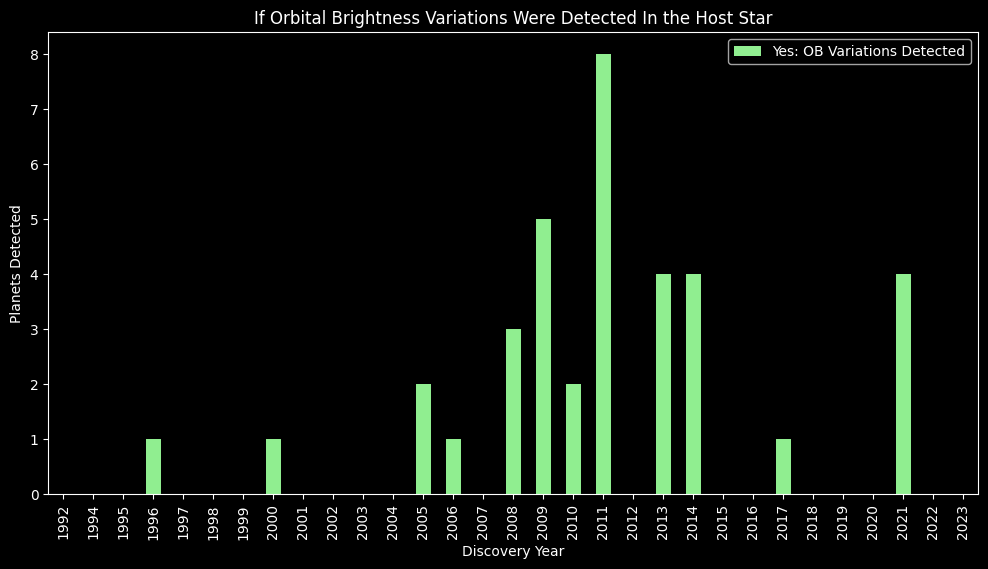

In [ ]:
# group6 = df.groupby(['disc_year', 'obm_flag']).size().unstack()
# # 'rv_flag',
# #  'pul_flag',
# #  'ptv_flag',
# #  'tran_flag',
# #  'ast_flag',
# #  'obm_flag',
# #  'micro_flag',
# #  'etv_flag',
# #  'ima_flag',
# #  'dkin_flag',


# # colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

# #plot bar chart
# ax = group6.plot(kind='bar', stacked=True, figsize=(12,6), color=['#bc5090','#90EE90'])#, hue_order=[1,0])

# plt.xlabel('Discovery Year')
# plt.ylabel('New Planets with Orbital Brightness Variations Measured')
# plt.title('If Orbital Brightness  Variations Were Detected In the Host Star')
# # plt.legend(title='Discovery Method',bbox_to_anchor=(1.02,1),loc='upper left')
# plt.legend(['No: OB Variations Not Detected', 'Yes: OB Variations Detected'])

df2 = df.copy();
df2['obm_flag'] = df2['obm_flag'].astype("category")
df2['obm_flag'] = df2['obm_flag'].cat.remove_categories([0])


group6 = df2.groupby(['disc_year', 'obm_flag']).size().unstack()


# colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

#plot bar chart
ax = group6.plot(kind='bar', stacked=True, figsize=(12,6), color=['#90EE90'])#, hue_order=[1,0])

plt.ylabel('Planets Detected')
plt.title('If Orbital Brightness Variations Were Detected In the Host Star')
plt.xlabel('Discovery Year')
plt.legend(['Yes: OB Variations Detected'])

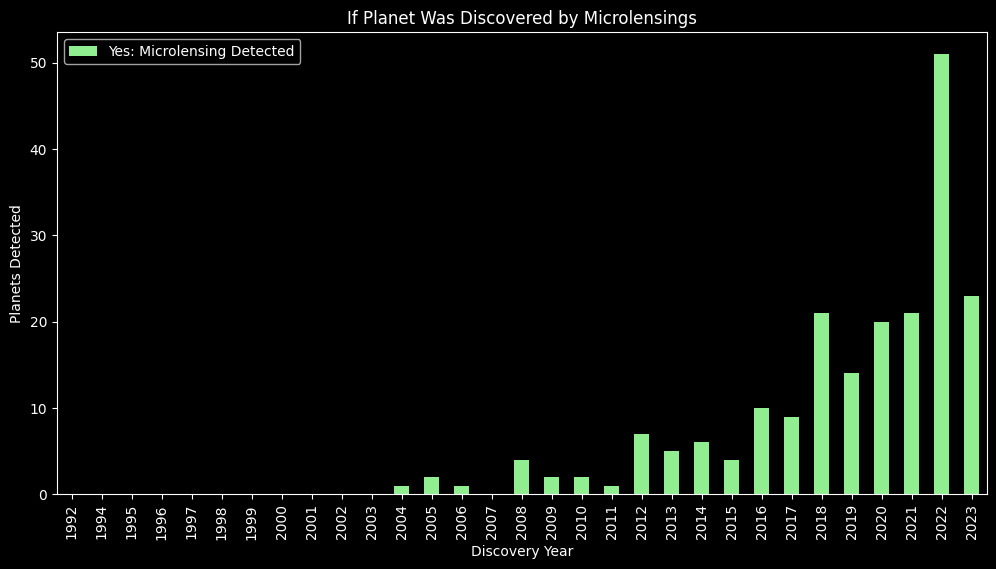

In [ ]:
# group7 = df.groupby(['disc_year', 'micro_flag']).size().unstack()
# # 'rv_flag',
# #  'pul_flag',
# #  'ptv_flag',
# #  'tran_flag',
# #  'ast_flag',
# #  'obm_flag',
# #  'micro_flag',
# #  'etv_flag',
# #  'ima_flag',
# #  'dkin_flag',


# # colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

# #plot bar chart
# ax = group7.plot(kind='bar', stacked=True, figsize=(12,6), color=['#bc5090','#90EE90'])#, hue_order=[1,0])

# plt.xlabel('Discovery Year')
# plt.ylabel('New Planets with Microlensing Measured')
# plt.title('If Planet Was Discovered by Microlensings')
# # plt.legend(title='Discovery Method',bbox_to_anchor=(1.02,1),loc='upper left')
# plt.legend(['No: Microlensing Not Detected', 'Yes: Microlensing Detected'])

df2 = df.copy();
df2['micro_flag'] = df2['micro_flag'].astype("category")
df2['micro_flag'] = df2['micro_flag'].cat.remove_categories([0])


group7 = df2.groupby(['disc_year', 'micro_flag']).size().unstack()


# colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

#plot bar chart
ax = group7.plot(kind='bar', stacked=True, figsize=(12,6), color=['#90EE90'])#, hue_order=[1,0])

plt.ylabel('Planets Detected')
plt.xlabel('Discovery Year')
plt.title('If Planet Was Discovered by Microlensings')
plt.legend(['Yes: Microlensing Detected'])

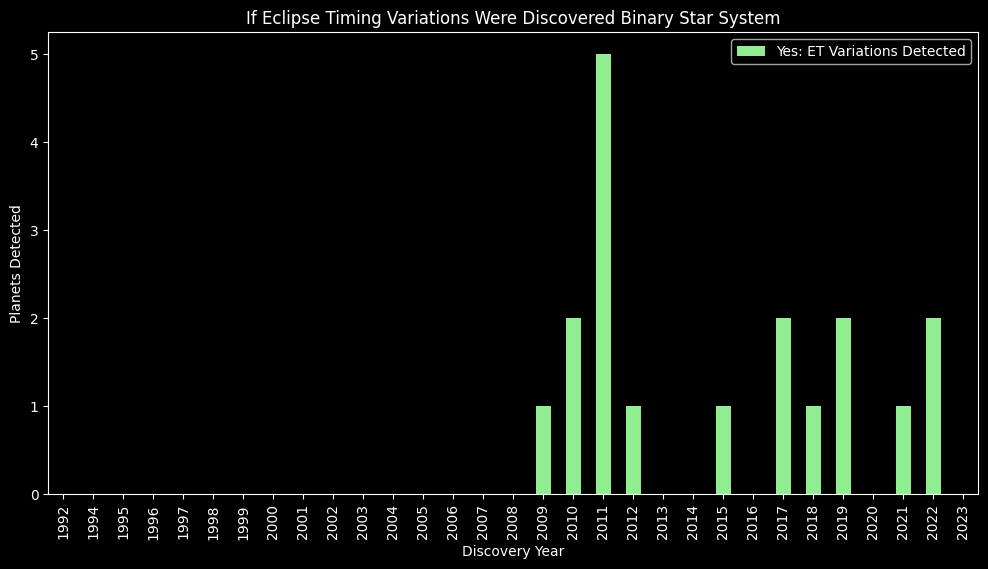

In [ ]:
# group8 = df.groupby(['disc_year', 'etv_flag']).size().unstack()
# # 'rv_flag',
# #  'pul_flag',
# #  'ptv_flag',
# #  'tran_flag',
# #  'ast_flag',
# #  'obm_flag',
# #  'micro_flag',
# #  'etv_flag',
# #  'ima_flag',
# #  'dkin_flag',


# # colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

# #plot bar chart
# ax = group8.plot(kind='bar', stacked=True, figsize=(12,6), color=['#bc5090','#90EE90'])#, hue_order=[1,0])

# plt.xlabel('Discovery Year')
# plt.ylabel('If Eclipse Timing Variations Were Detected In the Host Binary Start System')
# plt.title('If Eclipse Timing Variations Were Discovered Binary Star System')
# # plt.legend(title='Discovery Method',bbox_to_anchor=(1.02,1),loc='upper left')
# plt.legend(['No: ET Variations Not Detected', 'Yes: ET Variations Detected'])

df2 = df.copy();
df2['etv_flag'] = df2['etv_flag'].astype("category")
df2['etv_flag'] = df2['etv_flag'].cat.remove_categories([0])


group8 = df2.groupby(['disc_year', 'etv_flag']).size().unstack()


# colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

#plot bar chart
ax = group8.plot(kind='bar', stacked=True, figsize=(12,6), color=['#90EE90'])#, hue_order=[1,0])

plt.ylabel('Planets Detected')
plt.title('If Planet Detection Was Based on Imaging')
plt.xlabel('Discovery Year')
plt.title('If Eclipse Timing Variations Were Discovered Binary Star System')
plt.legend(['Yes: ET Variations Detected'])


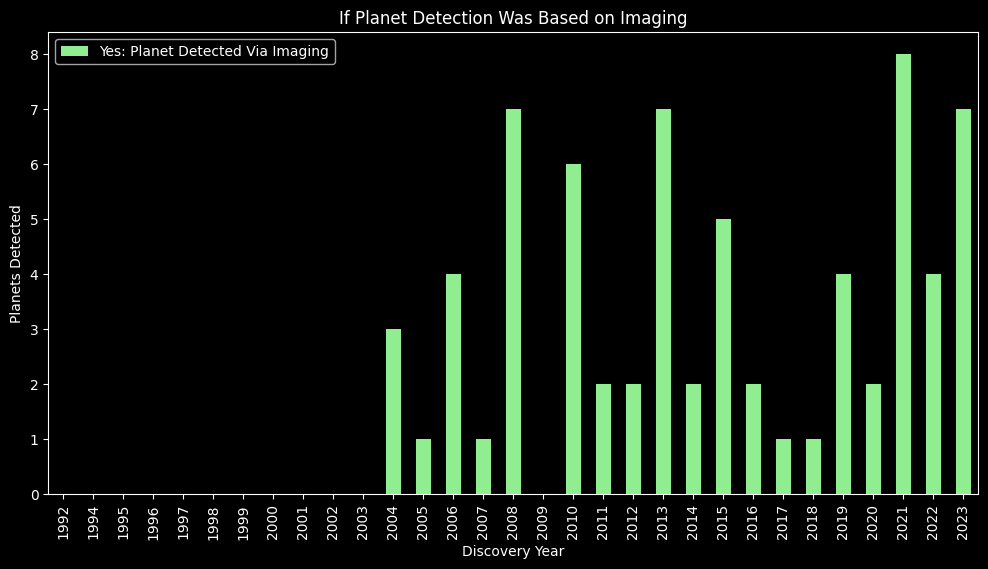

In [ ]:
# group9 = df.groupby(['disc_year', 'ima_flag']).size().unstack()
# # 'rv_flag',
# #  'pul_flag',
# #  'ptv_flag',
# #  'tran_flag',
# #  'ast_flag',
# #  'obm_flag',
# #  'micro_flag',
# #  'etv_flag',
# #  'ima_flag',
# #  'dkin_flag',


# # colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

# #plot bar chart
# ax = group9.plot(kind='bar', stacked=True, figsize=(12,6), color=['#bc5090','#90EE90'])#, hue_order=[1,0])

# plt.xlabel('Discovery Year')
# plt.ylabel('Planets Detected')
# plt.title('If Planet Was Detected Via Imaging')
# # plt.legend(title='Discovery Method',bbox_to_anchor=(1.02,1),loc='upper left')
# plt.legend(['No: Not Detected Via Imaging', 'Yes: Detected Via Imaging'])

df2 = df.copy();
df2['ima_flag'] = df2['ima_flag'].astype("category")
df2['ima_flag'] = df2['ima_flag'].cat.remove_categories([0])


group9 = df2.groupby(['disc_year', 'ima_flag']).size().unstack()


# colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

#plot bar chart
ax = group9.plot(kind='bar', stacked=True, figsize=(12,6), color=['#90EE90'])#, hue_order=[1,0])

plt.xlabel('Discovery Year')
plt.ylabel('Planets Detected')
plt.title('If Planet Detection Was Based on Imaging')
plt.legend(['Yes: Planet Detected Via Imaging'])

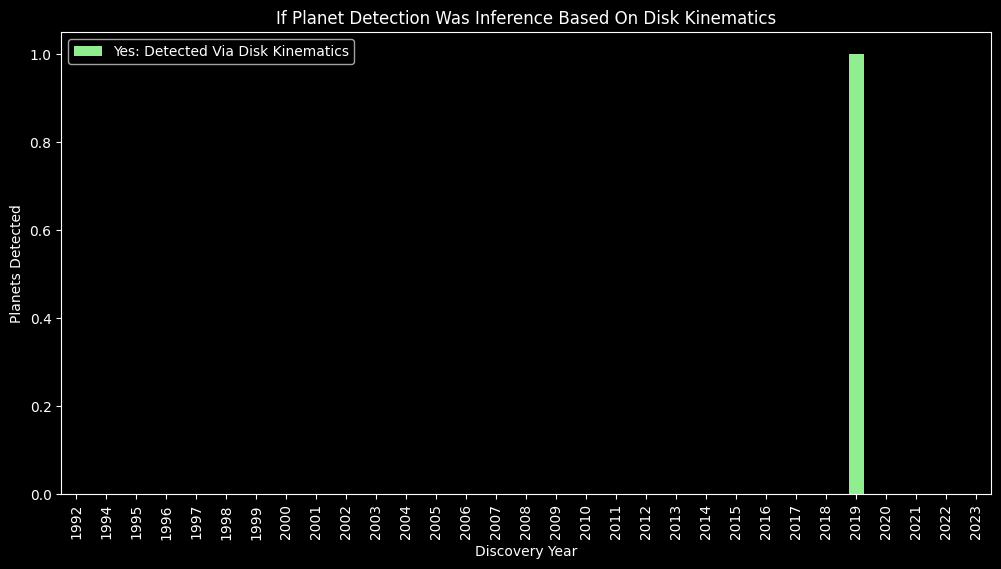

In [ ]:
# group10 = df.groupby(['disc_year', 'dkin_flag']).size().unstack()
# df2 = df.copy();
# 'rv_flag',
#  'pul_flag',
#  'ptv_flag',
#  'tran_flag',
#  'ast_flag',
#  'obm_flag',
#  'micro_flag',
#  'etv_flag',
#  'ima_flag',
#  'dkin_flag',
# df.loc[~(df==0).all(axis=1)]
# group10 = group10.loc[~(group10==1).all(axis=1)]
# df2 = df2[df2['dkin_flag'] > 0]
# group10 = df2.groupby(['disc_year', 'dkin_flag']).size().unstack()
# df2['dkin_flag'] = df2['dkin_flag'].astype("category")
# print(df2['dkin_flag'])
# df2['dkin_flag'].list
# list(df2['dkin_flag'].categories)
# df2['dkin_flag'] = df2['dkin_flag'].cat.remove_categories([0])


# df2['dkin_flag'] = df2['dkin_flag'].astype("category")
# df2['dkin_flag'] = df2['dkin_flag'].cat.remove_categories([0])

df2 = df.copy();
df2['dkin_flag'] = df2['dkin_flag'].astype("category")
df2['dkin_flag'] = df2['dkin_flag'].cat.remove_categories([0])


group10 = df2.groupby(['disc_year', 'dkin_flag']).size().unstack()


# colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])

#plot bar chart
ax = group10.plot(kind='bar', stacked=True, figsize=(12,6), color=['#90EE90'])#, hue_order=[1,0])

plt.xlabel('Discovery Year')
plt.ylabel('Planets Detected')
plt.title('If Planet Detection Was Inference Based On Disk Kinematics')
plt.legend(['Yes: Detected Via Disk Kinematics'])

Text(0.5, 1.0, 'Planet Discovery Method')

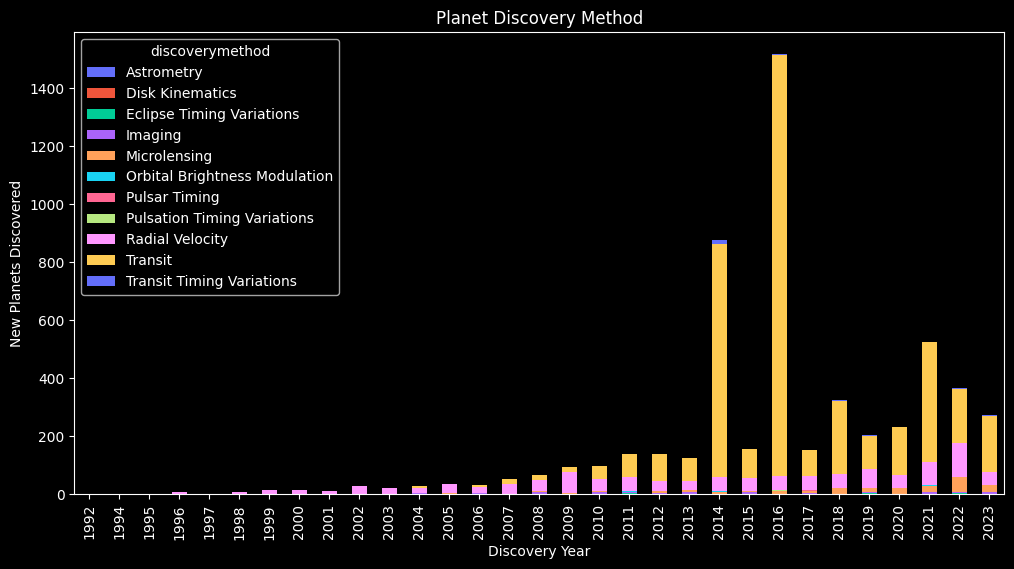

In [ ]:
# group11 = df.groupby(['disc_year', 'discoverymethod']).size().unstack()
df2 = df.copy();
# 'rv_flag',
#  'pul_flag',
#  'ptv_flag',
#  'tran_flag',
#  'ast_flag',
#  'obm_flag',
#  'micro_flag',
#  'etv_flag',
#  'ima_flag',
#  'dkin_flag',
# df2['discoverymethod'] = df2['discoverymethod'].astype("category")
# df2['discoverymethod'] = df2['discoverymethod'].cat.remove_categories(["Transit"])

# colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])
group11 = df2.groupby(['disc_year', 'discoverymethod']).size().unstack()

#plot bar chart
# ax = group11.plot(kind='bar', stacked=True, figsize=(12,6))#, color=['#bc5090','#90EE90'])#, hue_order=[1,0])
colors = ['#636EFA',  '#EF553B',  '#00CC96',  '#AB63FA',  '#FFA15A',  '#19D3F3',  '#FF6692',  '#B6E880',  '#FF97FF',  '#FECB52']

#plot bar chart
ax = group11.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)#['#90EE90'])#, hue_order=[1,0])


plt.xlabel('Discovery Year')
plt.ylabel('New Planets Discovered')
plt.title('Planet Discovery Method')
# plt.legend(title='Discovery Method',bbox_to_anchor=(1.02,1),loc='upper left')
# plt.legend(['No: Microlensing Not Detected', 'Yes: Microlensing Detected'])

Text(0.5, 1.0, 'Planet Discovery Method Without Transit')

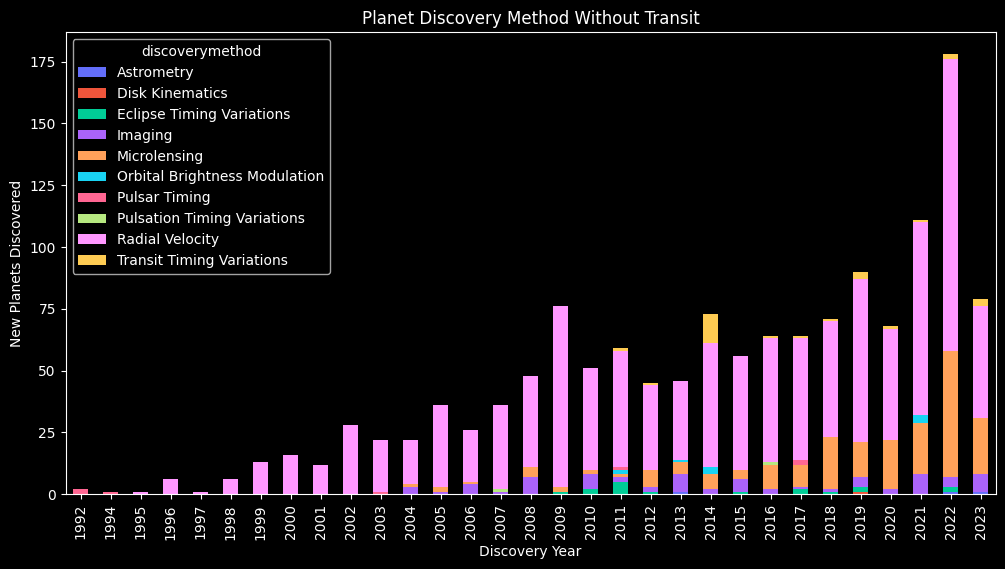

In [ ]:
# group12 = df.groupby(['disc_year', 'discoverymethod']).size().unstack()
df2 = df.copy();
# 'rv_flag',
#  'pul_flag',
#  'ptv_flag',
#  'tran_flag',
#  'ast_flag',
#  'obm_flag',
#  'micro_flag',
#  'etv_flag',
#  'ima_flag',
#  'dkin_flag',
df2['discoverymethod'] = df2['discoverymethod'].astype("category")
df2['discoverymethod'] = df2['discoverymethod'].cat.remove_categories(["Transit"])

# colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])
group12 = df2.groupby(['disc_year', 'discoverymethod']).size().unstack()

#plot bar chart
# ax = group12.plot(kind='bar', stacked=True, figsize=(12,6))#, color=['#bc5090','#90EE90'])#, hue_order=[1,0])
colors = ['#636EFA',  '#EF553B',  '#00CC96',  '#AB63FA',  '#FFA15A',  '#19D3F3',  '#FF6692',  '#B6E880',  '#FF97FF',  '#FECB52']

#plot bar chart
ax = group12.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)#['#90EE90'])#, hue_order=[1,0])


plt.xlabel('Discovery Year')
plt.ylabel('New Planets Discovered')
plt.title('Planet Discovery Method Without Transit')

Text(0.5, 1.0, 'Planet Discovery Method')

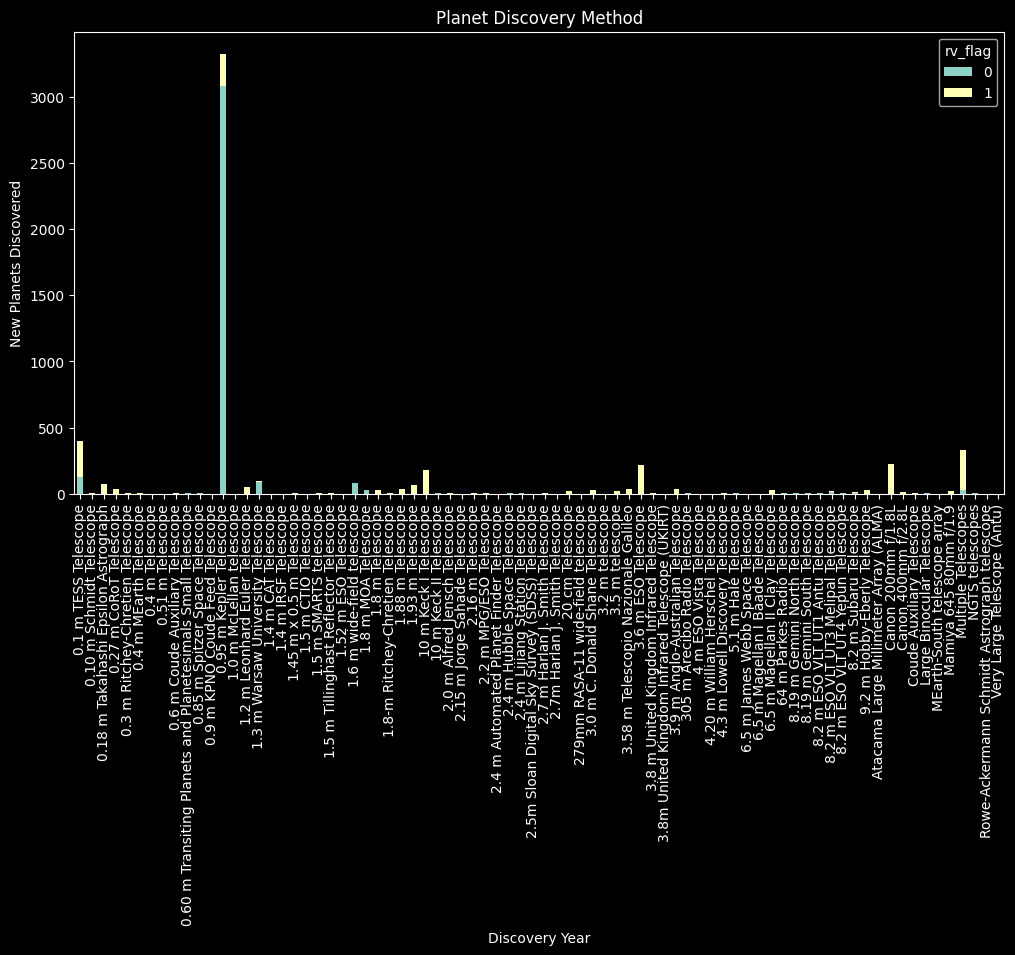

In [ ]:
df2 = df.copy();


# colors = plt.cm.rainbow([i/float(len(group1.columns))for i in range(len(group1.columns))])
group11 = df2.groupby(['disc_telescope', 'rv_flag']).size().unstack()

#plot bar chart
ax = group11.plot(kind='bar', stacked=True, figsize=(12,6))#, color=['#bc5090','#90EE90'])#, hue_order=[1,0])

plt.xlabel('Discovery Year')
plt.ylabel('New Planets Discovered')
plt.title('Planet Discovery Method')
# plt.legend(title='Discovery Method',bbox_to_anchor=(1.02,1),loc='upper left')
# plt.legend(['No: Microlensing Not Detected', 'Yes: Microlensing Detected'])